In [1]:
import pandas as pd
import sketch
import matplotlib.pyplot as plt
import dtale.app as dtale_app
import sweetviz as sv
from ydata_profiling import ProfileReport
import warnings
import dtale
import missingno as msno
from unidecode import unidecode

In [2]:
df = pd.read_csv("../datasets/movies_etl.csv")

In [3]:
df.head(30)

belongs_to_collection    budget  \
0             Toy Story Collection  30000000   
1                              NaN  65000000   
2        Grumpy Old Men Collection         0   
3                              NaN  16000000   
4   Father of the Bride Collection         0   
5                              NaN  60000000   
6                              NaN  58000000   
7                              NaN         0   
8                              NaN  35000000   
9            James Bond Collection  58000000   
10                             NaN  62000000   
11                             NaN         0   
12                Balto Collection         0   
13                             NaN  44000000   
14                             NaN  98000000   
15                             NaN  52000000   
16                             NaN  16500000   
17                             NaN   4000000   
18          Ace Ventura Collection  30000000   
19                             NaN  60000000   
20         Chili Palmer Collection  30250000   
21                             NaN         0   
22                             NaN  50000000   
23                             NaN         0   
24                             NaN   3600000   
25                             NaN         0   
26                             NaN  12000000   
27                             NaN         0   
28                             NaN  18000000   
29                             NaN         0   

                                               genres     id  \
0                   ['Animation', 'Comedy', 'Family']    862   
1                  ['Adventure', 'Fantasy', 'Family']   8844   
2                               ['Romance', 'Comedy']  15602   
3                      ['Comedy', 'Drama', 'Romance']  31357   
4                                          ['Comedy']  11862   
5            ['Action', 'Crime', 'Drama', 'Thriller']    949   
6                               ['Comedy', 'Romance']  11860   
7          ['Action', 'Adventure', 'Drama', 'Family']  45325   
8                 ['Action', 'Adventure', 'Thriller']   9091   
9                 ['Adventure', 'Action', 'Thriller']    710   
10                     ['Comedy', 'Drama', 'Romance']   9087   
11                               ['Comedy', 'Horror']  12110   
12               ['Family', 'Animation', 'Adventure']  21032   
13                               ['History', 'Drama']  10858   
14                            ['Action', 'Adventure']   1408   
15                                 ['Drama', 'Crime']    524   
16                               ['Drama', 'Romance']   4584   
17                                ['Crime', 'Comedy']      5   
18                   ['Crime', 'Comedy', 'Adventure']   9273   
19                      ['Action', 'Comedy', 'Crime']  11517   
20                    ['Comedy', 'Thriller', 'Crime']   8012   
21                              ['Drama', 'Thriller']   1710   
22       ['Action', 'Adventure', 'Crime', 'Thriller']   9691   
23  ['Drama', 'Fantasy', 'Science Fiction', 'Thril...  12665   
24                               ['Drama', 'Romance']    451   
25                                          ['Drama']  16420   
26                      ['Comedy', 'Drama', 'Family']   9263   
27                               ['Drama', 'Romance']  17015   
28        ['Fantasy', 'Science Fiction', 'Adventure']    902   
29                                 ['Drama', 'Crime']  37557   

   original_language                                           overview  \
0                 en  Led by Woody, Andy's toys live happily in his ...   
1                 en  When siblings Judy and Peter discover an encha...   
2                 en  A family wedding reignites the ancient feud be...   
3                 en  Cheated on, mistreated and stepped on, the wom...   
4                 en  Just when George Banks has recovered from his ...   
5                 en  Obsessive master thief, Neil McCauley leads a ...   
6             

# DTALE

In [4]:
# Vamos a usar el ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# Eliminar duplicados de filas
df_unique = df.drop_duplicates(keep=False)

In [12]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ['French'] if x == ['Français'] else x)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ['English','French'] if x == ['English','Français'] else x)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ['french'] if x == ['français'] else x)

In [14]:
df['day'] = df['day'].str.replace('L', 'lunes', case=False)
df['day'] = df['day'].str.replace('M', 'miercoles', case=False)
df['day'] = df['day'].str.replace('J', 'jueves', case=False)
df['day'] = df['day'].str.replace('V', 'viernes', case=False)
df['day'] = df['day'].str.replace('S', 'sabado', case=False)
df['day'] = df['day'].str.replace('D', 'domingo', case=False)


In [16]:
df['day'] = df['day'].str.replace('Lunes', 'lunes', case=False)
df['day'] = df['day'].str.replace('Martes', 'miercoles', case=False)
df['day'] = df['day'].str.replace('Miércoles', 'miercoles', case=False)
df['day'] = df['day'].str.replace('Jueves', 'jueves', case=False)
df['day'] = df['day'].str.replace('Viernes', 'viernes', case=False)
df['day'] = df['day'].str.replace('Sábado', 'sabado', case=False)
df['day'] = df['day'].str.replace('Domingo', 'domingo', case=False)
df['day'] = df['day'].str.replace('miércoles', 'miercoles', case=False)
df['day'] = df['day'].str.replace('sábado', 'sabado', case=False)

In [8]:
# Función recursiva para convertir caracteres especiales
def convert_special_characters(item):
    if isinstance(item, str):
        return unidecode(item)
    elif isinstance(item, list):
        return [convert_special_characters(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_special_characters(v) for k, v in item.items()}
    else:
        return item

# Supongamos que tienes un DataFrame llamado "df"

# Convertir caracteres especiales en todas las columnas y elementos
df = df.applymap(convert_special_characters)

In [9]:
# Función recursiva para convertir a minúsculas
def convert_to_lowercase(item):
    if isinstance(item, str):
        return item.lower()
    elif isinstance(item, list):
        return [convert_to_lowercase(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_to_lowercase(v) for k, v in item.items()}
    else:
        return item

# Supongamos que tienes un DataFrame llamado "df"

# Convertir todas las columnas y elementos a minúsculas
df = df.applymap(convert_to_lowercase)

In [6]:
dtale_app

2023-05-13 14:29:37,178 - ERROR    - Exception occurred while processing request: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "/home/jjcuri/.local/lib/python3.10/site-packages/dtale/views.py", line 112, in _handle_exceptions
    return func(*args, **kwargs)
  File "/home/jjcuri/.local/lib/python3.10/site-packages/dtale/views.py", line 2571, in get_data
    curr_dtypes = [c["name"] for c in global_state.get_dtypes(data_id)]
TypeError: 'NoneType' object is not iterable


In [ ]:
#dtale.show(df, host='localhost')

# SWEETVIZ

In [7]:
report = sv.analyze(df)

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |      | [  0%]   00:00 -> (? left)

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/home/jjcuri/.local/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated

In [6]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Se está abriendo en una sesión de navegador existente.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)


# MISSINGNO

<AxesSubplot: >

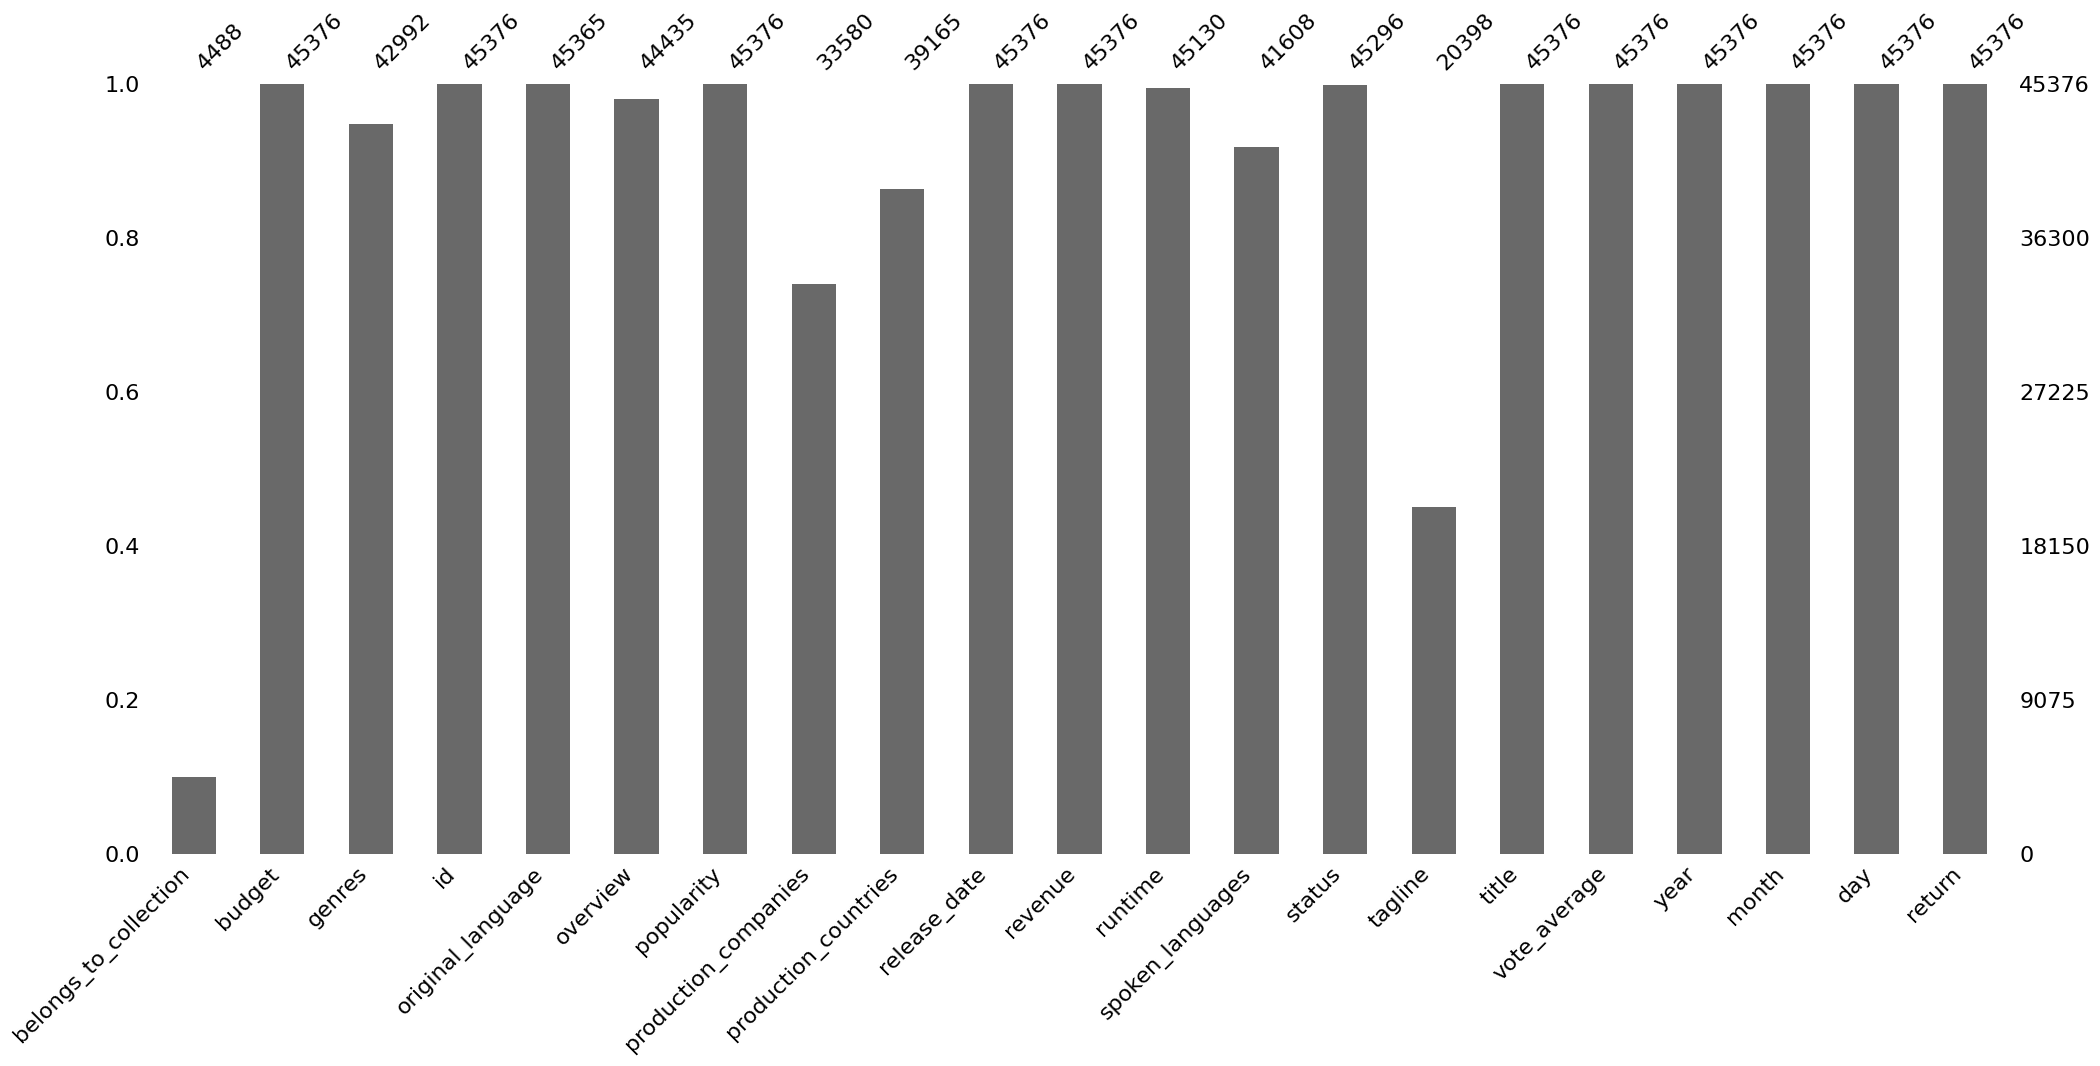

In [5]:
msno.bar(df)

<AxesSubplot: >

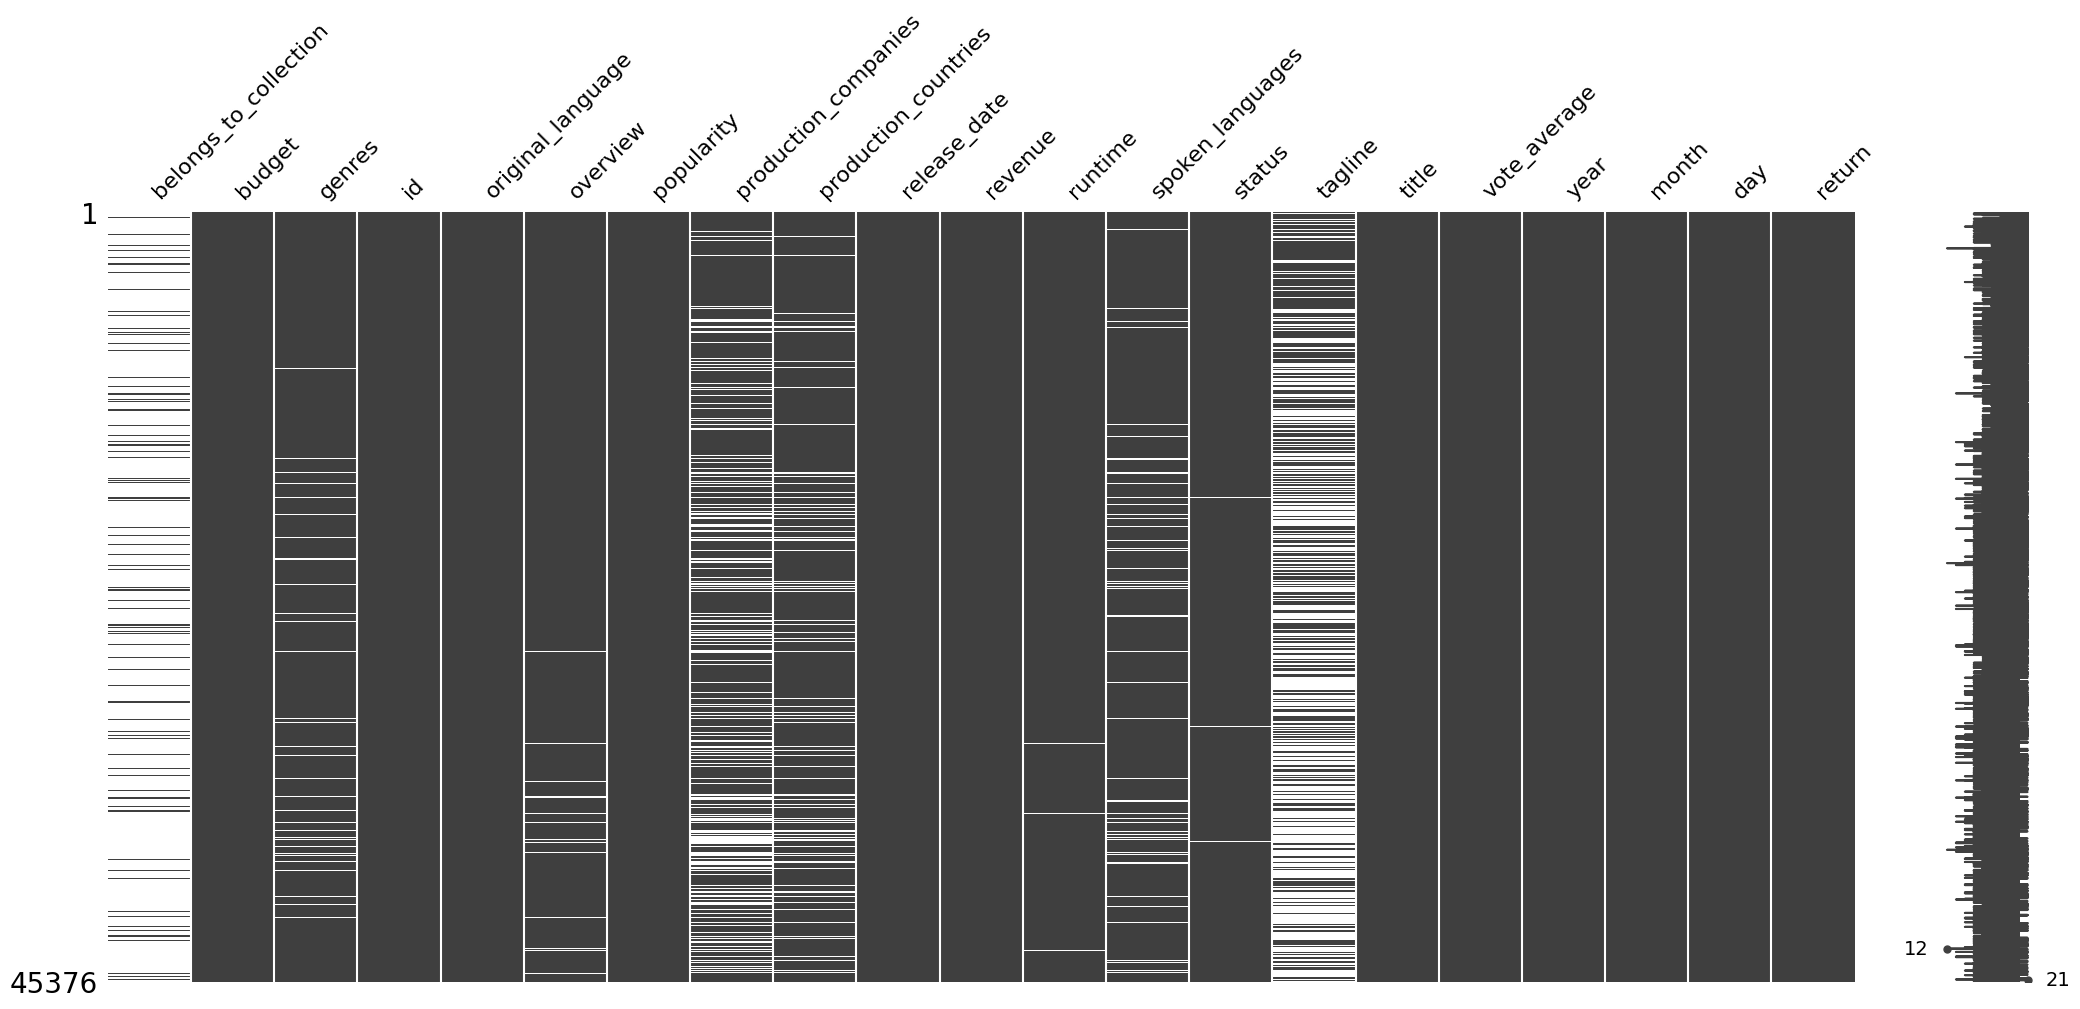

In [4]:
msno.matrix(df)

<AxesSubplot: >

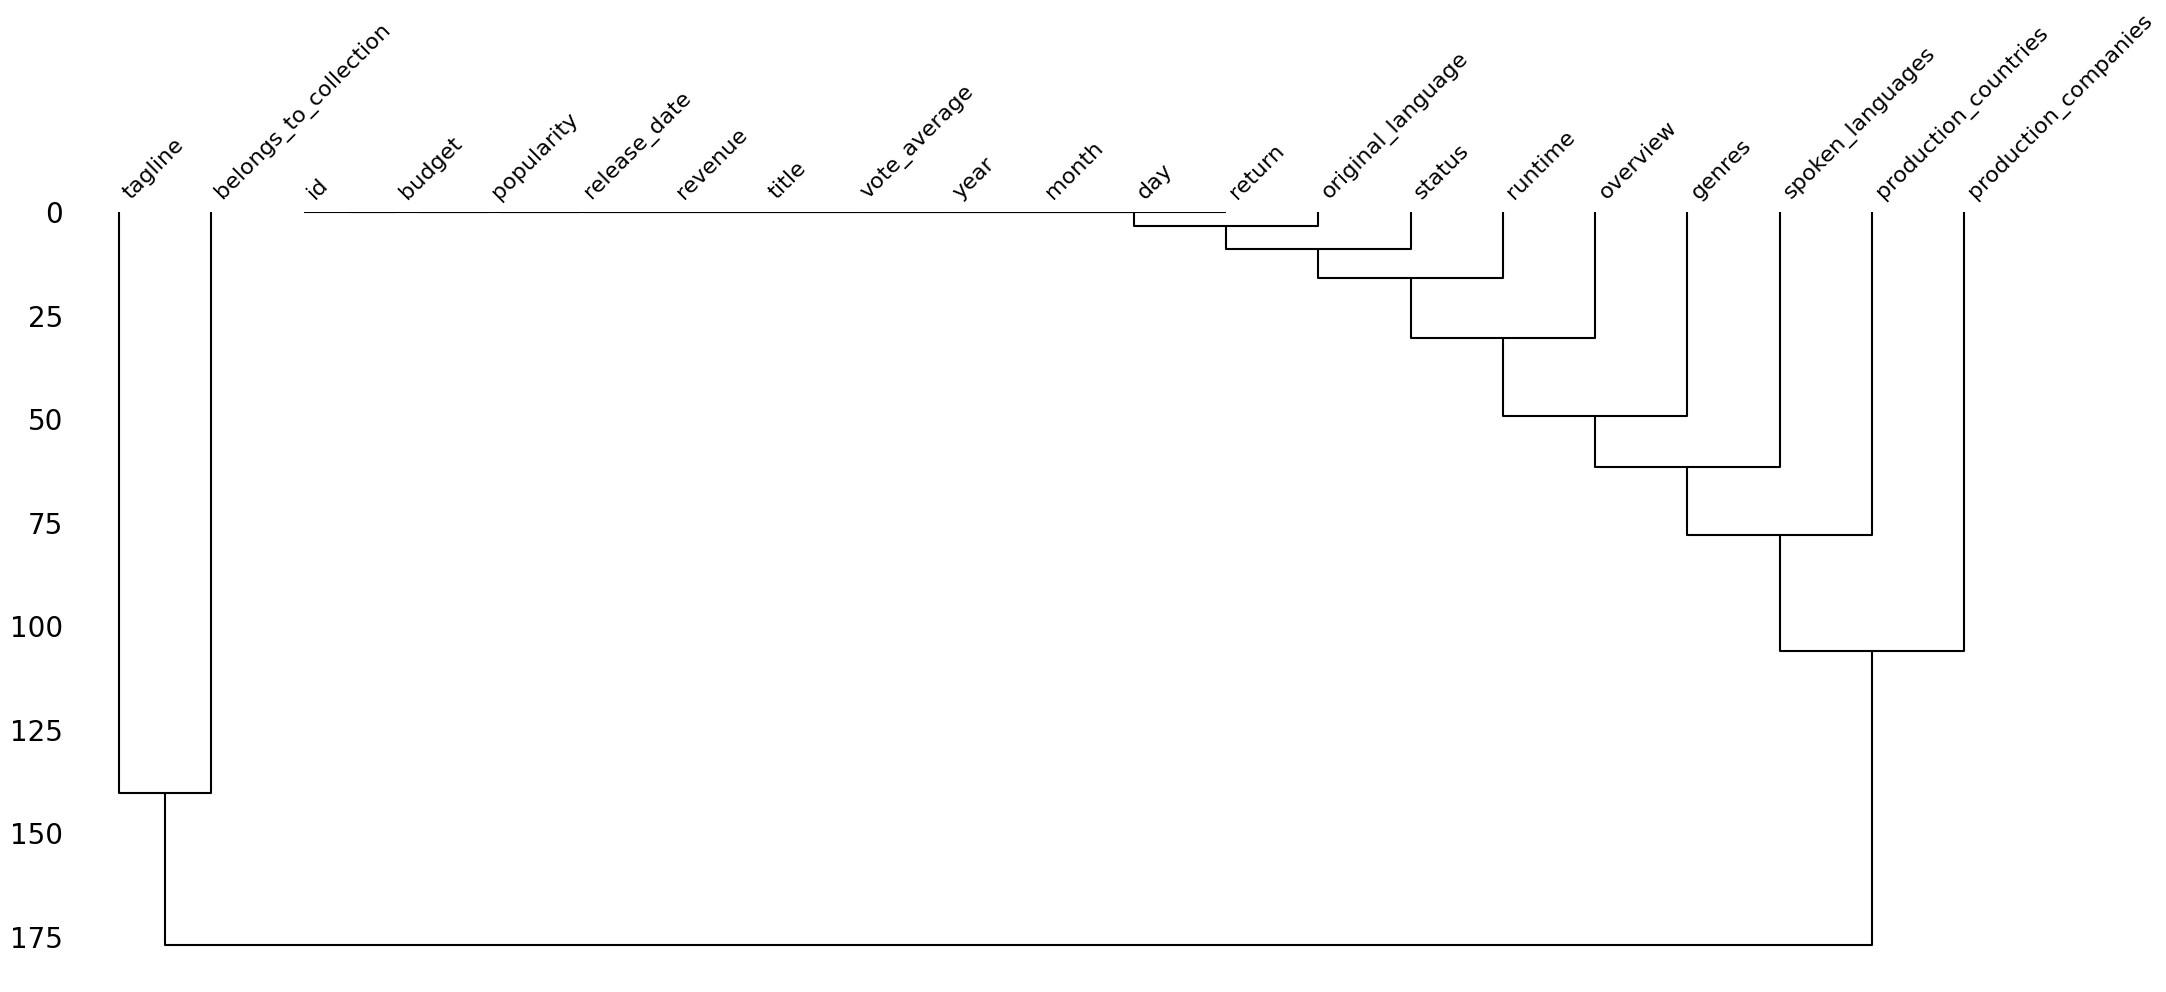

In [6]:
msno.dendrogram(df)

<AxesSubplot: >

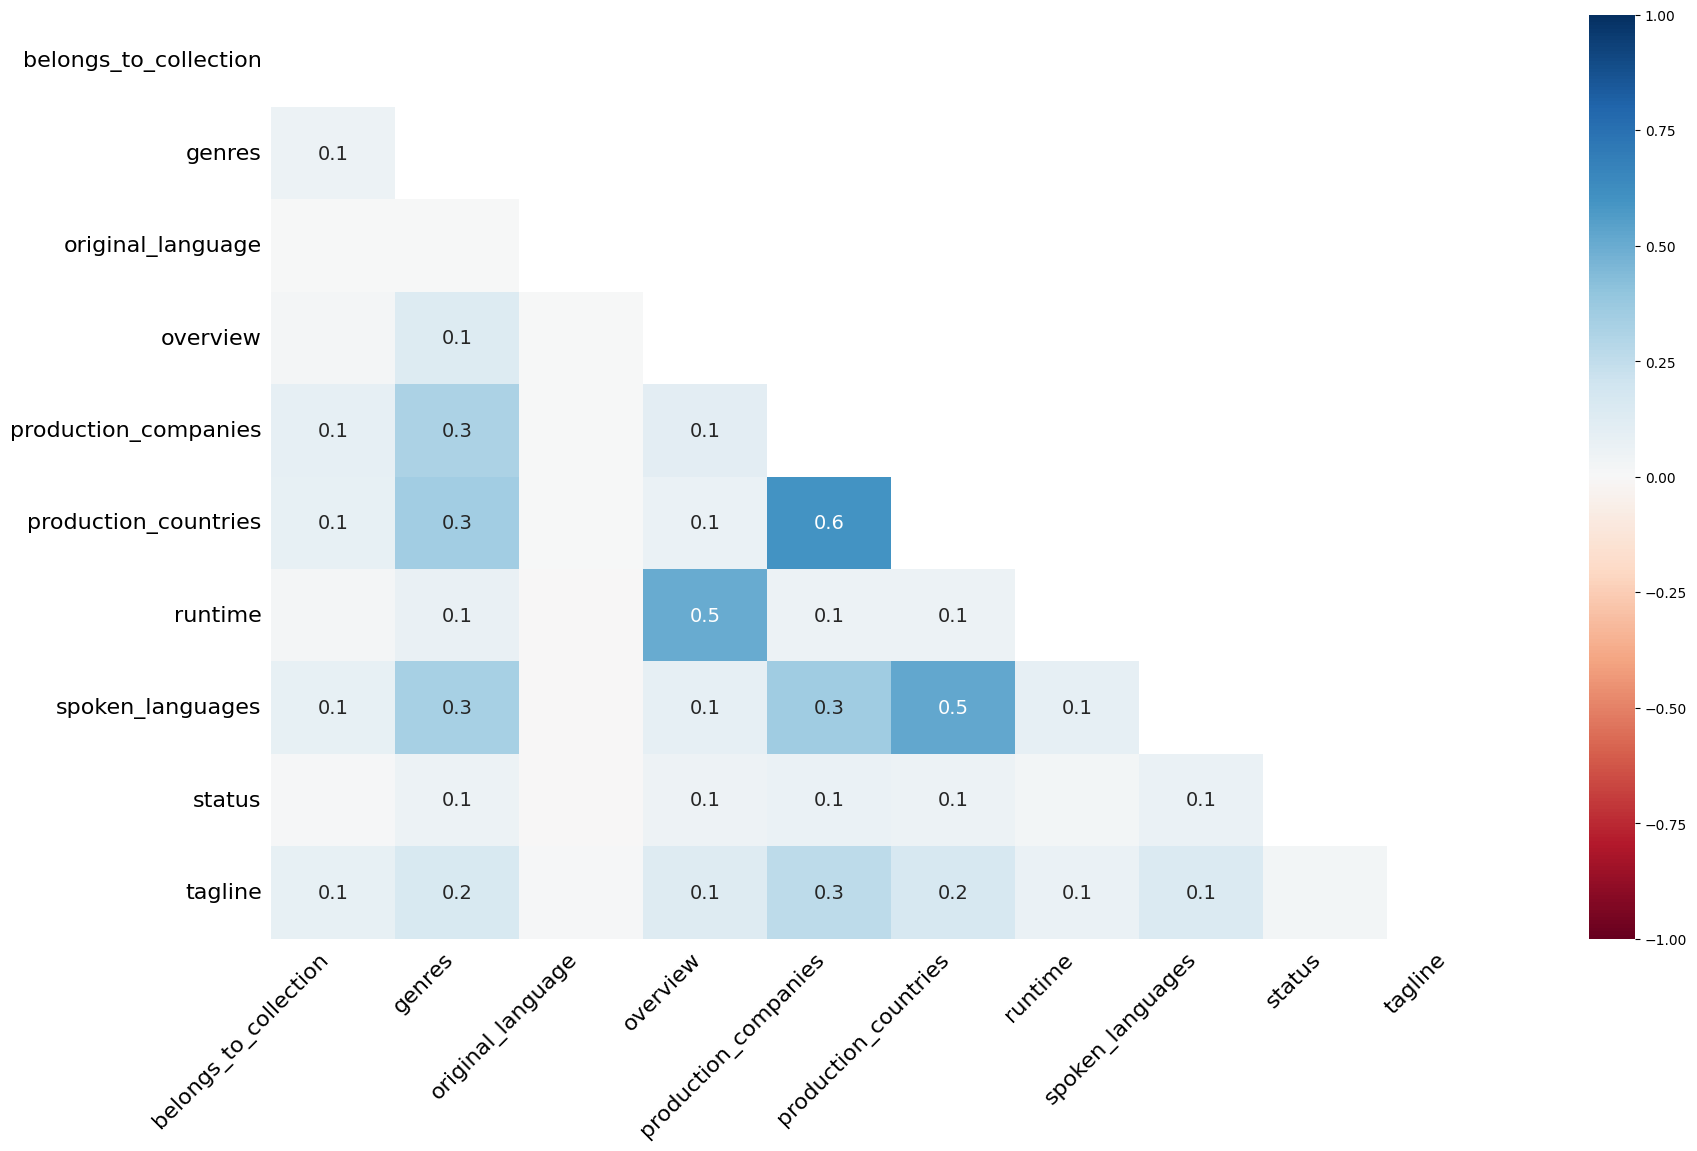

In [7]:
msno.heatmap(df)

# SCKETCH

In [ ]:
df.sketch.ask('podemos hablar en español?')

/tmp/ipykernel_185582/2507643704.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



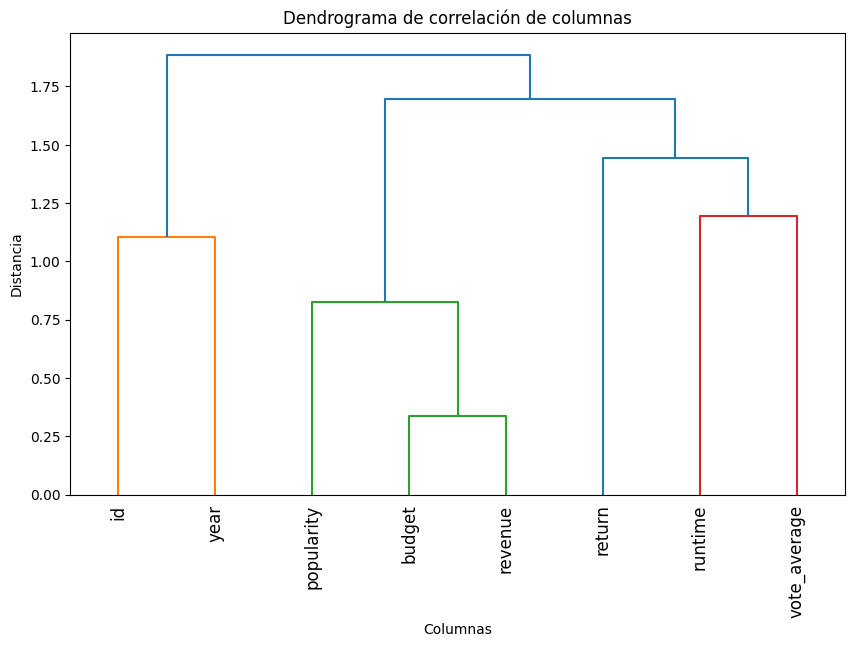

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# Calcula la matriz de correlación
corr_matrix = df.corr()

# Calcula las distancias entre las columnas
distances = hierarchy.distance.pdist(corr_matrix)

# Calcula el enlace jerárquico
linkage = hierarchy.linkage(distances, method='complete')

# Dibuja el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage, labels=corr_matrix.columns, leaf_rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Distancia')
plt.title('Dendrograma de correlación de columnas')
plt.show()
